37264


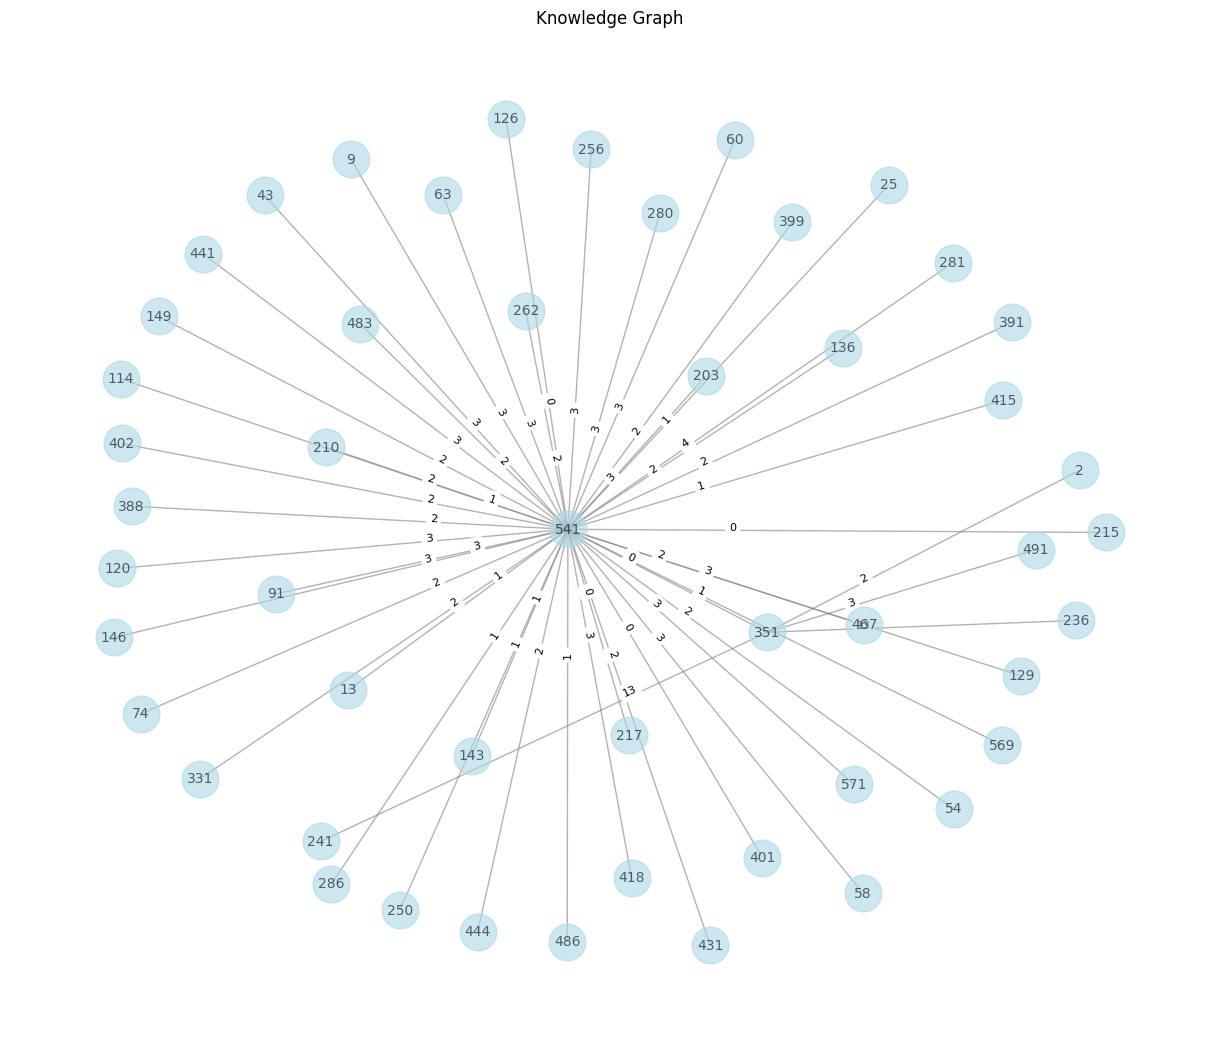

In [1]:
import sqlite3
from collections import defaultdict
import pandas as pd
import numpy as np

import networkx as nx
import matplotlib.pyplot as plt


def read_dataset(drug_name_id,num):
    kg = defaultdict(list)
    tails = {}
    relations = {}
    drug_list=[]
    filename = "../dataset/dataset"+str(num)+".txt"
    with open(filename, encoding="utf8") as reader:
        for line in reader:
            string= line.rstrip().split('//',2)
            head=string[0]
            tail=string[1]
            relation=string[2]
            drug_list.append(drug_name_id[head])
            if tail not in tails:
                tails[tail] = len(tails)
            if relation not in relations:
                relations[relation] = len(relations)
            if num==3:
                kg[drug_name_id[head]].append((drug_name_id[tail], relations[relation]))
                kg[drug_name_id[tail]].append((drug_name_id[head], relations[relation]))
            else:
                kg[drug_name_id[head]].append((tails[tail], relations[relation]))
    return kg,len(tails),len(relations)

def prepare(mechanism, action):
    d_label = {}
    d_event = []
    new_label = []
    for i in range(len(mechanism)):
        d_event.append(mechanism[i] + " " + action[i])
    count = {}
    for i in d_event:
        if i in count:
            count[i] += 1
        else:
            count[i] = 1
    list1 = sorted(count.items(), key=lambda x: x[1], reverse=True)
    for i in range(len(list1)):
        d_label[list1[i][0]] = i
    for i in range(len(d_event)):
        new_label.append(d_label[d_event[i]])
    return new_label,len(count)

def main():
    conn = sqlite3.connect("../dataset/event.db")
    df_drug = pd.read_sql('select * from drug;', conn)
    extraction = pd.read_sql('select * from extraction;', conn)
    mechanism = extraction['mechanism']
    action = extraction['action']
    drugA = extraction['drugA']
    drugB = extraction['drugB']
    new_label,event_num = prepare(mechanism, action)
    new_label = np.array(new_label)
    dict1 = {}
    for i in df_drug["name"]:
        dict1[i] = len(dict1)
    drug_name = [dict1[i] for i in df_drug["name"]]
    drugA_id = [dict1[i] for i in drugA]
    drugB_id = [dict1[i] for i in drugB]
    dataset1_kg, dataset1_tail_len, dataset1_relation_len = read_dataset(dict1,1)
    dataset2_kg, dataset2_tail_len, dataset2_relation_len = read_dataset(dict1,2)
    dataset3_kg, dataset3_tail_len, dataset3_relation_len = read_dataset(dict1,3)
    dataset4_kg, dataset4_tail_len, dataset4_relation_len = read_dataset(dict1,4)
    
    print(len(drugA_id))
    
    G = nx.Graph()
    
    sample_num = 50
    temp = 0
    for drug_id in dataset3_kg:
        for tail_id, relation_id in dataset3_kg[drug_id]:
            if temp >= sample_num:
                break
            temp += 1
            G.add_edge(drug_id, tail_id, label=relation_id)
            
    # Visualize the knowledge graph
    pos = nx.spring_layout(G, seed=42, k=0.9)
    labels = nx.get_edge_attributes(G, 'label')
    plt.figure(figsize=(12, 10))
    nx.draw(G, pos, with_labels=True, font_size=10, node_size=700, node_color='lightblue', edge_color='gray', alpha=0.6)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=8, label_pos=0.3, verticalalignment='baseline')
    plt.title('Knowledge Graph')
    plt.show()
            
    
if __name__ == "__main__":
    main()

In [2]:
import sqlite3
from collections import defaultdict
import pandas as pd
import numpy as np

import networkx as nx
import matplotlib.pyplot as plt

conn = sqlite3.connect("../dataset/event.db")
df_drug = pd.read_sql('select * from drug;', conn)
extraction = pd.read_sql('select * from extraction;', conn)
mechanism = extraction['mechanism']
action = extraction['action']
drugA = extraction['drugA']
drugB = extraction['drugB']
new_label,event_num = prepare(mechanism, action)

[1,
 3,
 2,
 0,
 0,
 3,
 2,
 3,
 1,
 1,
 0,
 0,
 2,
 2,
 0,
 0,
 12,
 3,
 2,
 0,
 0,
 2,
 0,
 0,
 2,
 3,
 0,
 2,
 0,
 3,
 0,
 2,
 0,
 1,
 2,
 2,
 2,
 0,
 3,
 3,
 2,
 3,
 2,
 1,
 2,
 0,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 0,
 0,
 2,
 3,
 2,
 2,
 0,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 2,
 2,
 2,
 2,
 38,
 0,
 0,
 2,
 2,
 2,
 0,
 2,
 2,
 0,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 18,
 18,
 0,
 2,
 2,
 2,
 1,
 0,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 0,
 2,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
